In [101]:
cd /content/drive/MyDrive/Colab_Notebooks/DL/Krish_Naik/Churn_Modelling

/content/drive/MyDrive/Colab_Notebooks/DL/Krish_Naik/Churn_Modelling


In [102]:
#! pip list


In [103]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
#!pip install --upgrade tensorflow

# Tensorflow version should be greater than 2.0.0 , so that Keras will be supported in version higher than 2.0

In [105]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [106]:
#import some basic libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [107]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [108]:
# Divide the Dataset into Independent and Dependent features

# Row number , Customer Id & Surname is not required, so we are removing

X = dataset.iloc[:,3:13] # from 3rd column to 13th column
y = dataset.iloc[:,13]


In [109]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [110]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Feature Engineering 


In [111]:
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [112]:
  geography = pd.get_dummies(X['Geography'], drop_first=True)
  geography.head(5)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [113]:
gender = pd.get_dummies(X['Gender'],drop_first=True)
gender.head(5)

,Male
0,0
1,0
2,0
3,0
4,0


In [114]:
## Concatenate these variales wirh dataframe

X = X.drop(['Geography','Gender'], axis=1) # axis= 1 will remove only the column.

In [115]:
X = pd.concat([X, geography, gender], axis=1)

# Splitting the dataset into Training & Test set



In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#Feature Scaling:



In [117]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [118]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [119]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [120]:
X_train.shape

(8000, 11)

# Lets create ANN

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU  #Activation functions
from tensorflow.keras.layers import Dropout


# Initialize ANN

In [122]:
classifier = Sequential()

In [123]:
# Adding input layer

classifier.add(Dense(units=11, activation='relu'))   # Dense is used for adding input layer, Hidden layer & O/P layer.
                                                     # units = 11 , number of input columns
                                                     # Activation will be Relu. This will be added to the next layer

In [124]:
# Adding  1st Hidden  layer with 7 Neurons

classifier.add(Dense(units=7, activation='relu'))   # Dense is used for adding input layer, Hidden layer & O/P layer.
classifier.add(Dropout(0.2))                         # units = 7 , number of neurons in 1st hidden layer
                                                     # Activation will be Relu.
                                                     # Dropout will deactivate the neuron once the value of 0.2 is reached

In [125]:
# Adding  2nd Hidden  layer with 6 Neurons

classifier.add(Dense(units=6, activation='relu'))   # Dense is used for adding input layer, Hidden layer & O/P layer.
                                                     # units = 6 , number of neurons in 2nd hidden layer
                                                     # Activation will be Relu. This will be added to the next layer

In [126]:
# Adding the O/P layer

classifier.add(Dense(units=1, activation='sigmoid'))   # # Dense is used for adding input layer, Hidden layer & O/P layer.
                                                       # units = 1 , number of neurons in O/P layer
                                                       # Activation will be Sigmoid. Since its a Binary Classification we must use Sigmoid.

# Train my ANN

In [127]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adam the best Optimizer. Adam uses the Learning rate of 0.01
                                                                                        # Loss Function will be 'Binary Crossentropy' as its a Loss Function
                                                                                        # Metrics will be 'Accurcay' 

In [128]:
# For information purpose
#In case if you want to add your own learning rate, you can import it from the below library

#import tensorflow
#opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

# Then add the optimizer values like below
# classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acccuracy'])

# Training our Neural Network

In [129]:
#Early stopping: when the Training Accuracy is not increasing for a long time, at that time, we can stop(Early Stop).

#Google 'Early Stopping in Keras'.

#tf.keras.callbacks.EarlyStopping(
#   monitor="val_loss",
#    min_delta=0,
#    patience=0,
#    verbose=0,
#    mode="auto",
#    baseline=None,
#    restore_best_weights=False,
#    start_from_epoch=0,
#)


#Early Stoping; You can play around with the values 

import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,      # Verbose should be 1 as I need to see all the details
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [130]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

# Validation_split =.33 ==> out of 100% of training data, we take (100 - 33 = 66) 66% of data for validation.

# 536/536 is the iteration based on the epoch and Batch size

# loss => training loss
# val_loss = validation loss

# After some point of time my accurcay will be stagnant, at that point of time, 

#Since in the above iteration, most of the time, its going around 88%. so I am going to stop . Stop the google colab proicess. we will 
 #introduce Early stopping

# early_stopping ==> though we gave epochs = 10000 , it will not run the epoch until 1000 as its a time consuming. once the Accuracy value is stabilised
# and if the Accuracy value is not getting increased after a particular time, the call_back will be executed and the execution will be stopped.
# If the Val_loss is not improving much , it will be stopped.


Epoch 1/1000
536/536 [==============================] - 4s 4ms/step - loss: 0.5190 - accuracy: 0.7959 - val_loss: 0.4604 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4485 - accuracy: 0.8063 - val_loss: 0.4387 - val_accuracy: 0.8103
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4366 - accuracy: 0.8147 - val_loss: 0.4329 - val_accuracy: 0.8088
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4216 - accuracy: 0.8216 - val_loss: 0.4278 - val_accuracy: 0.8076
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4144 - accuracy: 0.8242 - val_loss: 0.4237 - val_accuracy: 0.8133
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4049 - accuracy: 0.8319 - val_loss: 0.4144 - val_accuracy: 0.8160
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4033 - accuracy: 0.8317 - val_loss: 0.4076 - val_accuracy:

In the above O/P, its "Epoch 57: early stopping" with Accuracy 0.8707

In [131]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Summary History for Accuracy

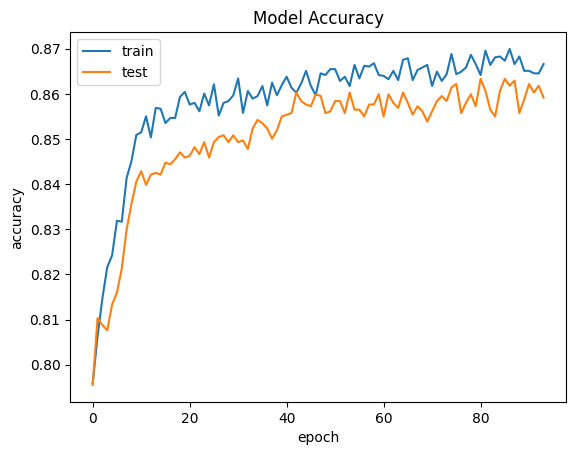

In [132]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# IN the below diagram, the size/gap is almost same or very less. 

# Summary History for Loss


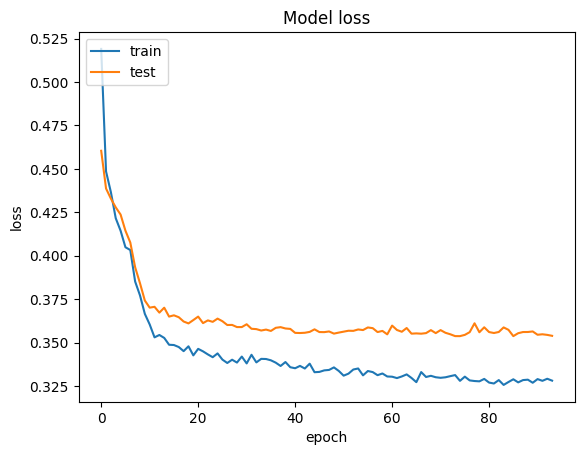

In [133]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Making the Predictions and evaluating the Model

In [134]:
# Predicting Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)   # If its GEQ 0.5 I will take it as 1 else 0  


63/63 [==============================] - 0s 1ms/step


# Create Confusion Matrix

In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1515,   80],
       [ 208,  197]])

# To calculate Accuracy

In [136]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print('Accuracy :', score)

Accuracy : 0.856


# To get the weights assigned to Neural Network

In [137]:
classifier.get_weights()   # These are all the weights value

[array([[-0.11255611, -0.06851732, -0.07627361,  0.02997827,  0.02678568,
         -0.09898562,  0.17204383, -0.37299556, -0.08093328, -0.10327001,
          0.04823163],
        [-0.41103417,  0.51125056, -0.64726275,  0.13529338, -0.77923256,
         -0.77706164, -0.41672108, -0.08738797, -0.21482767,  0.78663343,
         -0.39633343],
        [ 0.18228981, -0.2046163 ,  0.14235622,  0.32830465,  0.27131596,
          0.04629578,  0.69255227, -0.1668673 ,  0.4538815 ,  0.26304436,
         -0.33550233],
        [ 0.63163334,  0.03141203, -0.19993684,  0.38451135, -0.01630683,
         -0.16460381, -0.8158474 , -0.01858365, -0.791891  , -0.23289104,
         -0.16296838],
        [-0.25973797, -1.1903216 , -0.10748919,  1.048891  , -0.24868888,
         -0.23297518, -0.16013797,  0.5227168 , -1.3252763 , -0.06083227,
         -0.07718995],
        [ 0.08838701,  0.09445098,  0.21441133, -0.12428166, -0.3673074 ,
          0.156865  , -0.4993842 ,  0.10192878, -0.24830163, -0.0102022